In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import calendar
import plotly.graph_objects as go

In [9]:
def get_thermal_state(temperature):
    if temperature>=35.0 and temperature<37.3: 
        return "Normale","red"
    elif temperature>=37.3 and temperature<38.3: 
        return "Fièvre légère","orange"
    elif temperature>=38.3 and temperature<39.3: 
        return "Fièvre","yellow"
    elif  temperature>=39.3 and temperature<40.7:
        return "Forte fièvre","green"
    else :
        return "État thermique inconnu","black"

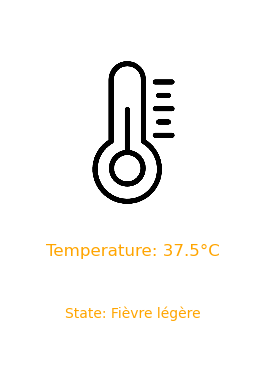

In [10]:
def visualize_temperature(temperature):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Set the aspect ratio to be equal
    ax.set_aspect('equal', adjustable='box')

    # Load personalized thermometer icon
    thermometer_icon = plt.imread('thermometer.png')  # Replace with the path to your thermometer icon image file

    # Display thermometer icon using OffsetImage
    thermometer_imagebox = OffsetImage(thermometer_icon, zoom=0.2)
    thermometer_ab = AnnotationBbox(thermometer_imagebox, (0, 0), frameon=False)
    ax.add_artist(thermometer_ab)
    state,color=get_thermal_state(temperature)
    # Set the temperature value as text
    ax.text(0, -1, f'Temperature: {temperature}°C', ha='center', fontsize=12,color=color)

    

    # Display the temperature state phrase
    ax.text(0, -1.5, f'State: {state}', ha='center', fontsize=10,color=color)

    # Set axis limits and remove axes ticks
    ax.set_xlim(-1, 1)
    ax.set_ylim(-2, 1)
    ax.axis('off')

    # Show the plot
    plt.show()

# Example usage
body_temperature = 37.5  # Replace with the actual body temperature
visualize_temperature(body_temperature)


In [47]:

data=pd.read_csv('vital_signals.csv')
data['date'] = pd.to_datetime(data['date'])

In [51]:
def temperature_history():
    # Get today's date
    today_date = np.datetime64(datetime.now().date())
    # Filter data for the last two months
    last_two_months_data = data[data['date'] >= (today_date - np.timedelta64(60, 'D')).astype('datetime64[D]')]
    print(last_two_months_data)
    # Create a filled line plot using plotly
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=last_two_months_data['date'],
        y=last_two_months_data['temperature'],
        fill='tozeroy',  # Filled area below the line
        mode='lines',
        line=dict(color='red', width=2),
        name='Temperature'
    ))

    # Add layout details
    fig.update_layout(
        title='Temperature des deux derniers mois ',
        xaxis=dict(title='Mois'),
        yaxis=dict(title='Temperature (°C)'),
        showlegend=True
    )

    # Show the plot
    fig.show()
temperature_history()

    temperature       date     month
86         38.1 2023-10-05   October
87         40.3 2023-10-13   October
88         35.3 2023-10-16   October
89         38.7 2023-10-16   October
90         35.4 2023-10-22   October
91         35.7 2023-10-23   October
92         35.6 2023-10-24   October
93         36.0 2023-10-25   October
94         36.0 2023-10-29   October
95         35.3 2023-11-07  November
96         35.0 2023-11-10  November
97         40.3 2023-11-15  November
98         40.3 2023-11-19  November
99         35.2 2023-11-26  November
